# To download tweets using twitter APi

In [1]:
"""import tweepy
import csv #Import csv
auth = tweepy.auth.OAuthHandler('xxxxxxxxx', 'xxxxxxxxxxxx')
auth.set_access_token('xxxxxxxxxx', 'xxxxxxxxxxxx')

api = tweepy.API(auth,wait_on_rate_limit=True)

# Open/create a file to append data to
csvFile = open('dataset.csv', 'a',encoding="utf-8",newline='')

#Use csv writer
csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.search,count=100000,
                           q = "Covid-19",re.sub('[^a-zA-Z]', '',clean )
                           tweet_mode='extended',
                           lang = "en").items():

    # Write a row to the CSV file. I use encode UTF-8
    csvWriter.writerow([tweet.full_text,tweet.user.screen_name,tweet.user.location])
    print(tweet.full_text,tweet.user.screen_name,tweet.user.location)
csvFile.close()"""

'import tweepy\nimport csv #Import csv\nauth = tweepy.auth.OAuthHandler(\'xxxxxxxxx\', \'xxxxxxxxxxxx\')\nauth.set_access_token(\'xxxxxxxxxx\', \'xxxxxxxxxxxx\')\n\napi = tweepy.API(auth,wait_on_rate_limit=True)\n\n# Open/create a file to append data to\ncsvFile = open(\'dataset.csv\', \'a\',encoding="utf-8",newline=\'\')\n\n#Use csv writer\ncsvWriter = csv.writer(csvFile)\n\nfor tweet in tweepy.Cursor(api.search,count=100000,\n                           q = "Covid-19",re.sub(\'[^a-zA-Z]\', \'\',clean )\n                           tweet_mode=\'extended\',\n                           lang = "en").items():\n\n    # Write a row to the CSV file. I use encode UTF-8\n    csvWriter.writerow([tweet.full_text,tweet.user.screen_name,tweet.user.location])\n    print(tweet.full_text,tweet.user.screen_name,tweet.user.location)\ncsvFile.close()'

# Importing dataset and Analysis

In [2]:
import pandas as pd
file_name='dataset.csv'
data = pd.read_csv(file_name, sep = ',',names = ['text','username','location'])
data.shape

(131563, 3)

In [3]:
data.head()

,text,username,location
0,RT @tsum_africa: In response to the current #C...,PaulABarter,Singapore
1,RT @FemAdesina: No presidential broadcast on C...,Abdulazizmento2,port Harcourt
2,Covid-19 Outbreak in Nigeria Is Just One of Af...,Ricardo_Gardel,"Tinton Falls, NJ"
3,RT @ChangeOrg_India: Walking miles without foo...,ahumanenough,NaN
4,RT @GhulamABilour: I have been tested positive...,tormakhay_s,"Sexi, Peru"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131563 entries, 0 to 131562
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   text      131563 non-null  object
 1   username  131563 non-null  object
 2   location  92721 non-null   object
dtypes: object(3)
memory usage: 3.0+ MB


In [5]:
data=data[(data['location'].notnull())]                      #dropping empty row
data = data.sample(frac=1).reset_index(drop=True)           #resetting index
data['len']=data["text"].str.len()                          #removing clipped tweets
df1= data[(data['len'] <=137)]
df2=data[(data['len'] >=150)]
data=pd.concat([df1,df2])                              
data = data.sample(frac=1).reset_index(drop=True)       #resetting index      

In [6]:
data.shape

(35482, 4)

In [7]:
data.head()

,text,username,location,len
0,Join Desile Adebayo on #CitizensCorner by #Onl...,onlinehubng,Abeokuta | Lagos | Nigeria,239
1,"COVID-19: Week after reopening schools, France...",daily_nigerian,Nigeria,93
2,@Gartner_IT's on-demand webinar shows how gove...,spandhann,Bangalore,222
3,@hellpants Oh dear!\nI remember your expectati...,daphnesargent,"Cape Town, South Africa",191
4,Vice President Pence speaks at COVID-19 briefi...,avnblogfeed,"Philadelphia, Pa",72


# Cleaning data set by removing RT ,Links and @username

In [8]:
import numpy as np
import re
def remove_pattern(input_txt, pattern):                                           #function to remove pattern 
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
def clean_tweets(lst):
    lst = np.vectorize(remove_pattern)(lst, "\r")                                  
    lst = np.vectorize(remove_pattern)(lst, "\n")
    lst = np.vectorize(remove_pattern)(lst, "RT @[\w]*:")                         # removing RT @x from tweets:
    lst = np.vectorize(remove_pattern)(lst, "@[\w]*")                             # removing  @xxx from tweets 
    lst = np.vectorize(remove_pattern)(lst, "https?://[A-Za-z0-9./]*")            # reremoving URL links http://xxx
    return lst

In [9]:
data['clean']= clean_tweets(data['text'])   #Cleaned Tweets are kept in separate coloumn

In [10]:
data.head()

,text,username,location,len,clean
0,Join Desile Adebayo on #CitizensCorner by #Onl...,onlinehubng,Abeokuta | Lagos | Nigeria,239,Join Desile Adebayo on #CitizensCorner by #Onl...
1,"COVID-19: Week after reopening schools, France...",daily_nigerian,Nigeria,93,"COVID-19: Week after reopening schools, France..."
2,@Gartner_IT's on-demand webinar shows how gove...,spandhann,Bangalore,222,'s on-demand webinar shows how government miss...
3,@hellpants Oh dear!\nI remember your expectati...,daphnesargent,"Cape Town, South Africa",191,Oh dear!I remember your expectations in Janua...
4,Vice President Pence speaks at COVID-19 briefi...,avnblogfeed,"Philadelphia, Pa",72,Vice President Pence speaks at COVID-19 briefing


# Function to label tweets based on their sentiment.

In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer           #vaderSentiment is used to tag tweets as positive, negative or neutral
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(text):
    score = analyser.polarity_scores(text)
    if score['compound'] >= 0.05 :
        return 2
    elif (score['compound'] > -0.05) and (score['compound'] < 0.05) : 
        return 1 
    else :
        return 0

ModuleNotFoundError: No module named 'vaderSentiment'

In [12]:
sentiments_using_vader = data.clean.apply(lambda text: sentiment_analyzer_scores(text))     #Each tweet goes throug vader function and gets labeled.
pd.DataFrame(sentiments_using_vader.value_counts())

NameError: name 'sentiment_analyzer_scores' is not defined

In [13]:
data['sentiment'] = sentiments_using_vader
data.head()

NameError: name 'sentiments_using_vader' is not defined

In [14]:
data.describe()

,len
count,35482.000000
mean,162.006961
std,77.083169
min,8.000000
25%,98.000000
50%,129.000000
75%,233.000000
max,832.000000


# Removing special characters, numbers, punctuations (except for #)

In [15]:
# remove special characters, numbers, punctuations (except for #)
data['clean'] = data['clean'].str.replace("[^a-zA-Z# ]", "")

# Removing stopwords ,converting into lower case and applying lematization.

In [16]:
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()
from nltk.corpus import stopwords
cleaned_tweets = []
for index, row in data.iterrows():            #This loop goes through every tweets and removes stopwords covnverts into lower case and applyes lematization
    words_without_stopwords = [wl.lemmatize(word.lower()) for word in row.clean.split() if not word in set(stopwords.words('english')) and '#' not in word.lower()]
    cleaned_tweets.append(' '.join(words_without_stopwords))
data['Fully_cleaned_tweets'] = cleaned_tweets
data.head(10)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\jadou/nltk_data'
    - 'C:\\Users\\jadou\\anaconda3\\nltk_data'
    - 'C:\\Users\\jadou\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\jadou\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\jadou\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


# Bargraph of Sentiment

In [17]:
import seaborn as sns
sents =[]
for tw in data.Fully_cleaned_tweets:
    st = sentiment_analyzer_scores(tw)
    sents.append(st)
ax = sns.distplot(sents,kde=False,bins=3)
ax.set(xlabel='Negative              Neutral               Positive',ylabel='#Tweets',title="Tweets of USA-corona")


AttributeError: 'DataFrame' object has no attribute 'Fully_cleaned_tweets'

# Emotion of the tweets

In [18]:
from collections import Counter

def con(sentence):
    emotion_list = []
    sentence = sentence.split(' ')
    with open('emotions.txt','r') as file:
        for line in file:
            clear_line = line.replace("\n", '').replace(",",'').replace("'",'').strip()
            word, emotion = clear_line.split(':')

            if word in sentence:
                emotion_list.append(emotion)
        w = Counter(emotion_list)
        return w
    

In [19]:
data['emotion'] = data['Fully_cleaned_tweets'].apply(lambda x: con(x) )

KeyError: 'Fully_cleaned_tweets'

In [20]:
data.head(10)

,text,username,location,len,clean
0,Join Desile Adebayo on #CitizensCorner by #Onl...,onlinehubng,Abeokuta | Lagos | Nigeria,239,Join Desile Adebayo on #CitizensCorner by #Onl...
1,"COVID-19: Week after reopening schools, France...",daily_nigerian,Nigeria,93,COVID Week after reopening schools France regi...
2,@Gartner_IT's on-demand webinar shows how gove...,spandhann,Bangalore,222,s ondemand webinar shows how government missio...
3,@hellpants Oh dear!\nI remember your expectati...,daphnesargent,"Cape Town, South Africa",191,Oh dearI remember your expectations in Januar...
4,Vice President Pence speaks at COVID-19 briefi...,avnblogfeed,"Philadelphia, Pa",72,Vice President Pence speaks at COVIDbriefing
5,Today is the date The European Intellectual Pr...,fsplaw,"Reading,",174,Today is the date The European Intellectual Pr...
6,shey when the Ooni said we should try herbs to...,LANREWAJU_,LAGOS,137,shey when the Ooni said we should try herbs to...
7,RT @anandMenon1: I missed this excoriating pie...,EdwardBowman13,Liverpool,129,I missed this excoriating piece yesterday fro...
8,"During this period of covid-19, we did our Tow...",HITECLuxembourg,"Mamer, Luxembourg",195,During this period of covid we did our Town ha...
9,Don't use public transport but please be aware...,rbrtsmith,England 🇪🇺,174,Dont use public transport but please be aware ...


In [21]:
emo=con(data['Fully_cleaned_tweets'].sum())

KeyError: 'Fully_cleaned_tweets'

In [22]:
data['text'][8]

'During this period of covid-19, we did our Town hall meeting with all of our employees off- and onsite by videoconference. We are happy to have spent this moment together. https://t.co/sefUrMMk7z'

# Plotting emotion bar graph

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
plt.bar(emo.keys(),emo.values())
plt.xticks(rotation = 90)
plt.show()

NameError: name 'emo' is not defined

<Figure size 1080x720 with 0 Axes>

# Wordcloud

In [24]:
from PIL import Image
from wordcloud import WordCloud,ImageColorGenerator
import urllib
import requests
import matplotlib.pyplot as plt
def generate_wordcloud(all_words):
    Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
    image_colors = ImageColorGenerator(Mask)
    wc = WordCloud(background_color='black', height=750, width=2000,mask=Mask).generate(all_words)
    plt.figure(figsize=(10,20))
    plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")
    plt.axis('off')
    plt.show()

ModuleNotFoundError: No module named 'wordcloud'

# Wordcloud for Positive Sentiment

In [25]:
all_words = ' '.join([text for text in data['Fully_cleaned_tweets'][data.sentiment == 2]])
generate_wordcloud(all_words)

KeyError: 'Fully_cleaned_tweets'

# Wordcloud for Neutral Sentiment

In [26]:
all_words = ' '.join([text for text in data['clean'][data.sentiment == 1]])
generate_wordcloud(all_words)

AttributeError: 'DataFrame' object has no attribute 'sentiment'

# Wordcloud for Negative Sentiment

In [27]:
all_words = ' '.join([text for text in data['clean'][data.sentiment == 0]])
generate_wordcloud(all_words)

AttributeError: 'DataFrame' object has no attribute 'sentiment'

# Creating Hastag FreqDist

In [28]:
import nltk
                                                  #function to collect hashtags
def hashtag_extract(text_list):
    hashtags = []
    # Loop over the words in the tweet
    for text in text_list:
        ht = re.findall(r"#(\w+)", text)
        hashtags.append(ht)

    return hashtags

def generate_hashtag_freqdist(hashtags):
    a = nltk.FreqDist(hashtags)
    d = pd.DataFrame({'Hashtag': list(a.keys()),
                      'Count': list(a.values())})
    # selecting top 15 most frequent hashtags     
    d = d.nlargest(columns="Count", n = 25)
    plt.figure(figsize=(16,7))
    ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
    plt.xticks(rotation=80)
    ax.set(ylabel = 'Count')
    plt.show()

In [29]:
hashtags = hashtag_extract(data['clean'])
hashtags = sum(hashtags, [])

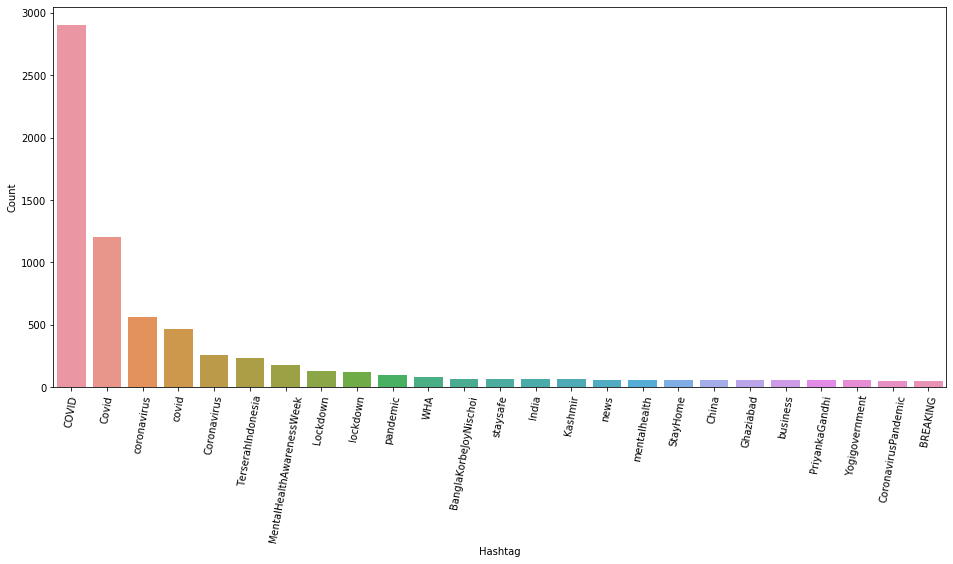

In [30]:
generate_hashtag_freqdist(hashtags)

# Tweets location bargraph

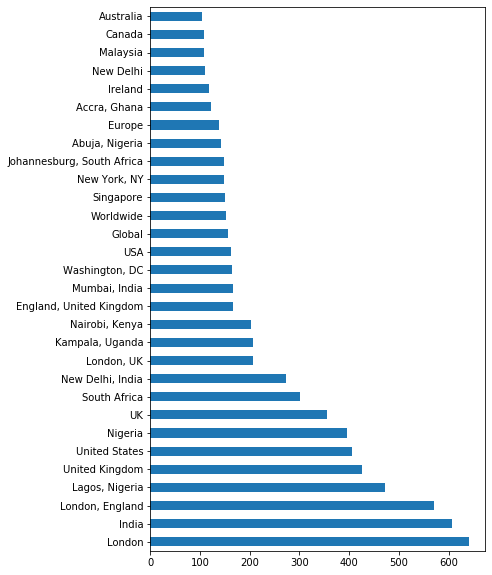

In [31]:
data['location'].value_counts().head(30).plot(kind='barh', figsize=(6,10))

# Extracting X and y from dataset

In [32]:
x = data.iloc[:,-2].values
y = data.iloc[:,-3].values

# Creating tfid vectorizer model

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
x = tfidf_word_vectorizer.fit_transform(x)

AttributeError: 'numpy.int64' object has no attribute 'lower'

# Creating training and test data from the featureset and output label.

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#  Create and training a Machine Learning model.

In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[278. 105. 229. ...  63. 108. 125.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Validate the model created.

In [36]:
predictions = classifier.predict(X_test.toarray())

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

# Predicting sentiment of manual input

In [37]:
file_name='TestTweet.csv'
test=pd.read_csv(file_name)  

In [38]:
test['clean']=clean_tweets(test['text']) 
test['clean']=test['clean'].str.replace("[^a-zA-Z ]", " ")

In [39]:
for i,tweet in enumerate(test['clean']):
    op=classifier.predict(tfidf_word_vectorizer.transform([tweet]).toarray())
    if op == [0]:
        print(i,")"," ' ",test.text[i]," ' ",'\n','=','NEGATIVE','\n')
    if op == [1]:
        print(i,")"," ' ",test.text[i]," ' ",'\n','=','NEUTRAL','\n')
    if op == [2]:
        print(i,")"," ' ",test.text[i]," ' ",'\n','=','POSITIVE','\n')

NotFittedError: Vocabulary not fitted or provided

In [40]:
tweet="@briantylercohen Hey #Insane @realDonaldTrump ! Are you crazy? ANY of them don't need to die at all."
clean=clean_tweets(tweet)
clean=str(clean)
clean=re.sub('[^a-zA-Z]', ' ',clean )
clean=[clean]
op=classifier.predict(tfidf_word_vectorizer.transform(clean).toarray())
if op == [0]:
    print(tweet,'\n','=','NEGATIVE','\n')
if op == [1]:
    print(tweet,'\n','=','NEUTRAL','\n')
if op == [2]:
    print(tweet,'\n','=','POSITIVE','\n')

NotFittedError: Vocabulary not fitted or provided

# Evaluate the model

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('Accuracy score : ',accuracy_score(y_test, predictions)*100,'\n')

NameError: name 'predictions' is not defined

In [42]:
print(confusion_matrix(y_test,predictions),'\n')

NameError: name 'predictions' is not defined

In [43]:
print(classification_report(y_test,predictions))

NameError: name 'predictions' is not defined